<center>

![Stock Image](https://i.imgur.com/2YhxhEm.jpeg)

</center>

---

# <left>**Live Code 7 : Rock Paper Scissors Hand Signs Prediction**</left>

---

# **Table Of Contents**



1. [**Introduction**](#class1)
    * [*Objective*](#class1a)
    * [*Dataset Information*](#class1b)
2. [**Import Libraries**](#class2)
3. [**Data Loading**](#class3)
4. [**Exploratory Data Analysis**](#class4)
5. [**Feature Engineering**](#class5)
6. [**ANN Training (Sequential API / Functional API)**](#class6)
    * [*Model Definition*](#class6a)
    * [*Model Training*](#class6b)
    * [*Model Evaluation*](#class6c)
7. [**ANN Improvement (Sequential API / Functional API)**](#class7)
    * [*Model Definition*](#class7a)
    * [*Model Training*](#class7b)
    * [*Model Evaluation*](#class7c)
8. [**Model Saving**](#class8)
9. [**Model Inference**](#class9)
10. [**Conclusion**](#class10)

---

# <a id="class1" style="">**1. Introduction**</a> 

---

**Name :** Michael Parsaoran   
**Batch :** HCK-016   

## <a id="class1a">*Objective*</a>

The goal of this project is to construct a Convolutional Neural Network (CNN) model that predicts hand signs when playing rock paper scissors. We'll explore the images within the data using Convolutional Neural Network. Each model will be carefully evaluated by looking at their performance graph and metrics such as F1 score. After trying the first model, we'll fine-tune its neural network to improve its accuracy too. Finally, we'll compare the tuned model with the base one to choose the best option for predicting hand signs accurately and reliably.

## <a id="class1b">*Dataset Information*</a>

 This project utilizes a raw dataset sourced from kaggle.com titled *"Rock-Paper-Scissors Images"* shared by DrgFreeman. The dataset comprises images captured by himself as a part of his hobby. Below, you'll find a detailed description the dataset. For access to the dataset source, you can click [here!](https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors)

---

# <a id="class2">**2. Import Libraries**</a>

---

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
from pathlib import Path
import random

# Feature Engineering
from rembg import remove
from PIL import Image
from glob import glob
from cv2 import imread, imwrite

# Modelling
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from cv2 import Canny, inRange

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

**Import Libraries - Explanation**

Before we commence the project, we `import all the necessary libraries required to facilitate various tasks throughout the project`. Each library serves as a tool for specific purposes as indicated by the comments provided above the code. These libraries provide functionalities ranging from data manipulation, visualization, and model building, etc., enabling us to efficiently conduct data analysis and develop machine learning models for our project.

---

# <a id="class3">**3. Data Loading**</a> 

---

**Explanation**

To begin analyzing a dataset of images featuring hands playing rock-paper-scissors, we'll load the dataset into our Jupyter notebook. This dataset includes various images representing the hand gestures for rock, paper, and scissors. By importing and processing this data, we aim to build a model that can recognize and classify these hand gestures, enabling us to develop applications that can accurately interpret the game of rock-paper-scissors through image recognition.

In [8]:
import os
for dirname, _, filenames in os.walk('rps-cv-images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

rps-cv-images\README_rpc-cv-images.txt


In [9]:
directory = 'rps-cv-images'
new_dir = 'rps-cv-rembg'
print(os.listdir(directory))

labels = ['paper','scissors','rock']
nb = len(labels)

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors', 'test.png']


In [10]:
labels = ['paper','scissors','rock']
nb = len(labels)

In [12]:
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            img=load_img(os.path.join(folder,image), target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0                       # Normalization
            dataset.append((img,count))
        print(f'\rCompleted: {label}',end='')
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

**Explanation**



In [13]:
X, y = input_target_split(directory,labels)

Completed: rocksors

---

# <a id="class4">**4. Exploratory Data Analysis (EDA)**</a>

---

In [7]:
def createPie(dir, labels):
    lab = [word.capitalize() for word in labels] # Capitalize every label (e.g. scissors -> Scissors)
    imgs = []
    for label in labels:
        imgdir = os.path.join(dir, label)
        imgs.append(len(os.listdir(imgdir))) # Append size of each hand sign to imgs
    
    
    
    # Creating piechart
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].bar(lab, imgs, color=['red', 'darkblue', 'darkgreen'])
    axs[0].set_title('Bar Plot of Images Amount for Each Hand Sign')
    axs[0].set_xlabel('Hand Sign Class')
    axs[0].set_ylabel('Amount')
    axs[0].grid(axis='y', linestyle='--', alpha=1)  

    axs[1].set_title("Pie Chart of Images Amount for Each Hand Sign")
    axs[1].pie(imgs, labels=lab, autopct='%1.1f%%',  colors = ['red', 'darkblue', 'darkgreen'])
    
    plt.show()

**Explanation**

The code above is a function for creating pie chart, showing the distribution of the image set for each class. By using this function, we insert the directory and labels for each class (for this instance is `rock`, `paper` and `scissors`)

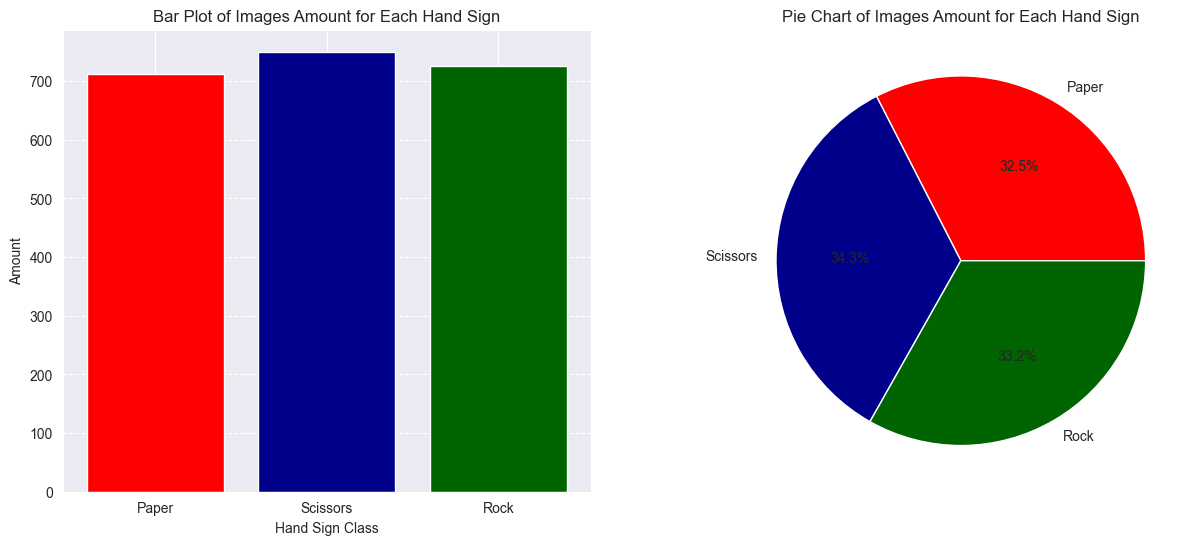

In [8]:
createPie(directory, labels)

# lab, imgs = createPie(directory, labels)

# df = pd.DataFrame(lab, imgs)
# plt.figure(figsize=(8,8))
# plt.pie(df, labels=['Paper', 'Scissors', 'Rock'])
# # plt.figure(figsize=(8,8))
# # plt.pie(pie.value_counts(), labels=['Paper', 'Scissors', 'Rock'], autopct='%1.1f%%')

**Explanation**

From this chart, we can observe that the images are fairly evenly distributed among the three categories, with Scissors having the highest proportion of images and Paper having the least, though the differences are relatively small. This suggests that there is a balanced dataset with a slight preference towards Scissors.

In [17]:
# Function to rename our label from numeric to categorical

def renameLabel(label):
    conds = [
        label == 0,
        label == 1,
        label == 2
    ]
    
    choice = [
        'Paper',
        'Scissors',
        'Rock'
    ]
    
    return np.select(conds, choice)

In [24]:
# Display 16 picture of the dataset with their labels
def show_randIMG(arr, label, rows=4, cols=4, size=(10,10)):
    rand = np.random.randint(0, len(y), 16)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                            subplot_kw={'xticks': [], 'yticks': []})
    n = 1
    for i, ax in enumerate(axes.flat):
        ax.imshow(arr[rand[i]])
        ax.set_title(renameLabel(label[rand[i]]))
    plt.tight_layout()
    plt.show()

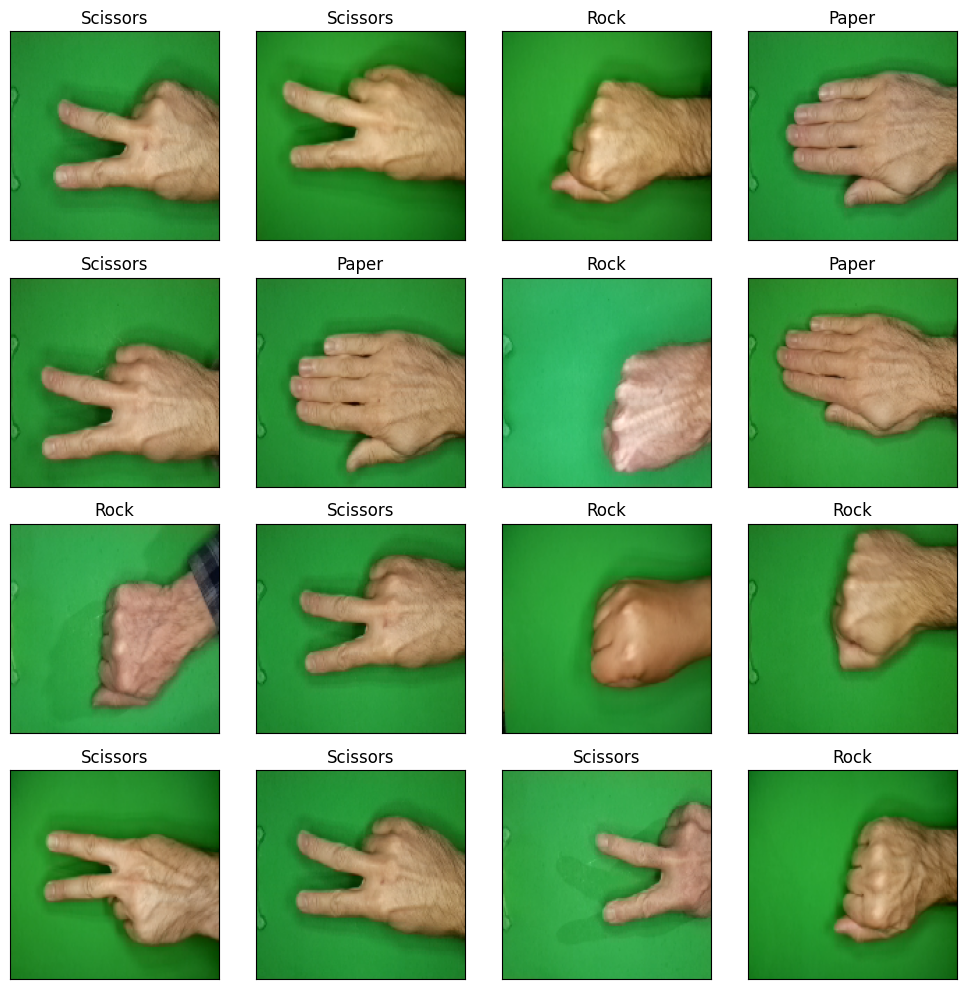

In [27]:
show_randIMG(X, y)

**Explanation**

This code generates a plot showing random images from the dataset. Above the pictures generated we can see the label for each images. Although the image's dimension is 300 x 200 pixels, we can see that the ratio for each image is 1:1, indicating that the images were squeezed from it's original size.

---

# <a id="class5">**5. Feature Engineering**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/256/2861/2861721.png" alt="drawing" width="64" align="center"/></a>

---

In [11]:
tdir = "rps-cv-rembg"
hshape = ['paper', 'rock', 'scissors']

old_dir = 'rps-cv-images'

In [12]:
def createDir(dir, path: list):
    '''
    This command is used to create a new directory to store the image
    after we remove the background, and then save it in .png
    '''
    if not os.path.exists(dir):
        os.mkdir(dir)
        print(f'Directory {dir} created')
    else:
        print(f"Directory {dir} already exists")
    
    for n in range(len(path)):
        np = os.path.join(dir, path[n])
        if not os.path.exists(np):
            os.mkdir(np)
            print(f'Directory {np} created')
        else:
            print(f"Directory {np} already exists")

**createDir() - Explanation**

The main usage of the function `createDir()` is to create a new directory that mimicks the original image dataset folders and directory, to store images with its background removed by using `remGen()` which i will explain later.

In [64]:
def rembGen(dir, tdir, path):
    
    '''
    This function is used to remove the background of each picture
    and save all of them to a new folder.
    '''
    if os.path.isdir(dir):
        for n in range((len(path))):
            print(f"Selecting {path[n]}")
            s_path = os.path.join(dir, path[n])
            t_path = os.path.join(tdir, path[n])
            
            if os.path.isdir(s_path) and os.path.isdir(t_path):
                counter = 1 
                for file in Path(s_path).glob("*.png"):
                    # rand = int(str(np.random.rand(1).tolist()[0]).split(".")[1])          
                    filename = f"{path[n]}_{counter}.png"
                    # print(filename)
                    img = Image.open(file)
                    output = remove(img)
                    output.save(os.path.join(t_path, filename), "PNG")
                    print(f"{counter} | File {filename} saved in {t_path}")
                    
                    counter+=1
            else:
                return "Path not found"
    else:
        return "Directory not found"

In [67]:
rembGen("rps-cv-images", "rps-cv-rembg", labels)

Selecting paper
*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:456 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************
1 | File paper_1.png saved in rps-cv-rembg\paper
*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:456 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvi

**rembGen() - Explanation**

The function `rembGen()` is used to remove the background from each image in the dataset by using rembg, a python package that utilizes U-Net, a neural network architecture developed by Olaf Ronneberger for biomedical image segmentation. By using this function we can transform all images in our dataset to a completely new folder that we made in `createDir()` before.

In [29]:
X_rem, y_rem = input_target_split(new_dir, labels)

Completed: rocksors

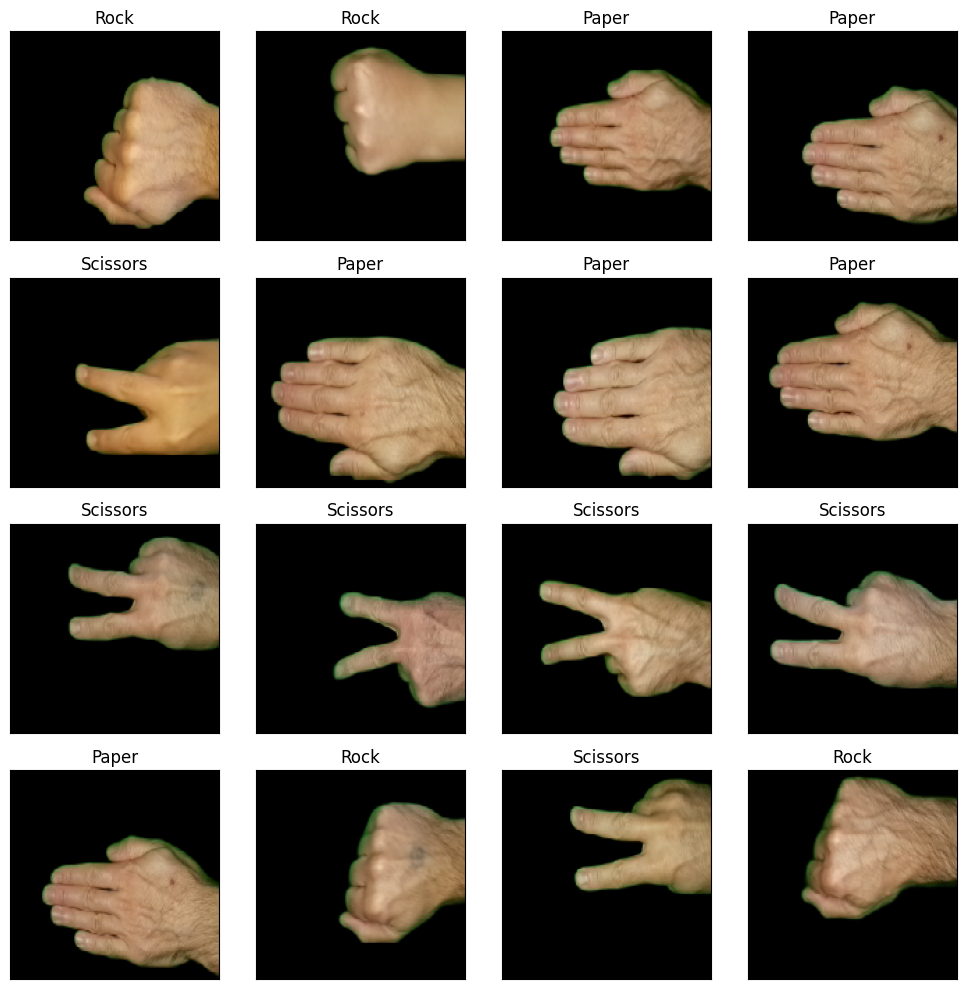

In [30]:
show_randIMG(X_rem, y_rem)

In [ ]:
def edgingIMG(X: np.ndarray, y: np.ndarray):
    new_X = np.ndarray()
    for img in X:
        new_img = array_to_img(img)
        output = Canny(new_img, threshold1=50, threshold2=80)
        
    

---

# <a id="class6">**6. ANN Training (Sequential API / Functional API)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.freepik.com/512/2103/2103633.png" alt="drawing" width="64" align="center"/></a>

---

## <a id="class6a">a. *Model Definition*</a>

## <a id="class6b">b. *Model Training*</a>

In [42]:
new_img = X_rem[4].astype(np.uint8)
output = Canny(new_img, threshold1=50, threshold2=80)
display(array_to_img(output))

ValueError: Expected image array to have rank 3 (single image). Got array with shape: (150, 150)

## <a id="class6c">c. *Model Evaluation*</a>

---

# <a id="class7">**7. ANN Improvement (Sequential API / Functional API)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/7747/7747363.png" alt="drawing" width="64" align="center"/></a>

---

## <a id="class7a">a. *Model Definition*</a>

## <a id="class7b">b. *Model Training*</a>

## <a id="class7c"> c. *Model Evaluation*</a>

---

# <a id="class8">**8. Model Saving**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/1004/1004755.png" alt="drawing" width="64" align="center"/></a>


---

---

# <a id="class9">**9. Model Inference**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/10930/10930725.png" alt="drawing" width="64" align="center"/></a>

---

---

# <a id="class10">**10. Conclusion**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.freepik.com/256/11063/11063232.png" alt="drawing" width="64" align="center"/></a>

---